In [1]:
# Install kaggle
# !pip install -q kaggle

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

2024-09-20 05:53:49.381162: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-20 05:53:49.508990: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-20 05:53:49.587860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-20 05:53:49.713485: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-20 05:53:49.748879: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-20 05:53:49.907854: I tensorflow/core/platform/cpu_feature_gu

In [3]:
# Download the dataset, unzip it and remove the zip file
# !kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess -p /workspaces/Zidio-Internship/Data/ --unzip

In [4]:
# Load the dataset
paths = []
labels = []

for dirname, _, filenames in os.walk('/workspaces/Zidio-Internship/Data/tess toronto emotional speech set data/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
    
print('Dataset is loaded')

Dataset is loaded


In [5]:
# Check the length of the paths
len(paths)

2800

In [6]:
# Read the first five paths
paths[:5]

['/workspaces/Zidio-Internship/Data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_gaze_ps.wav',
 '/workspaces/Zidio-Internship/Data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_fall_ps.wav',
 '/workspaces/Zidio-Internship/Data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_half_ps.wav',
 '/workspaces/Zidio-Internship/Data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_hole_ps.wav',
 '/workspaces/Zidio-Internship/Data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_shall_ps.wav']

In [7]:
# Create the dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/workspaces/Zidio-Internship/Data/tess toronto...,ps
1,/workspaces/Zidio-Internship/Data/tess toronto...,ps
2,/workspaces/Zidio-Internship/Data/tess toronto...,ps
3,/workspaces/Zidio-Internship/Data/tess toronto...,ps
4,/workspaces/Zidio-Internship/Data/tess toronto...,ps


In [8]:
# Check the value counts of the labels
df['label'].value_counts()

label
ps         400
disgust    400
neutral    400
happy      400
sad        400
angry      400
fear       400
Name: count, dtype: int64

In [9]:
# Check dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   speech  2800 non-null   object
 1   label   2800 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB


<Axes: xlabel='label', ylabel='count'>

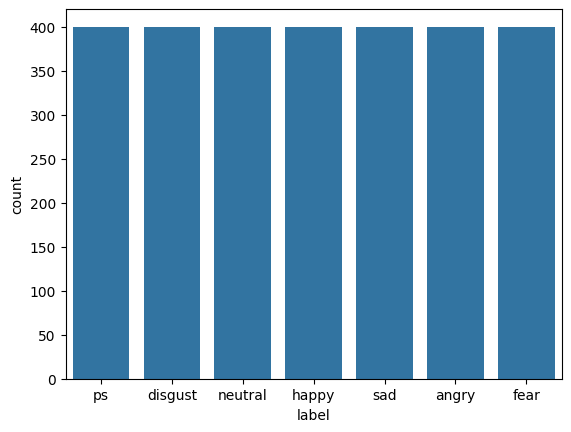

In [10]:
# Visualize the value of the labels
sns.countplot(data=df, x='label')

In [11]:
# Define waveplot and spectogram functions
def waveplot(data, sr, emotion):
    """
    This function plots the waveplot of the audio file
    """
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    """
    This function plots the spectogram of the audio file
    """
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

In [12]:
# Unique labels
df['label'].unique()

array(['ps', 'disgust', 'neutral', 'happy', 'sad', 'angry', 'fear'],
      dtype=object)

PS


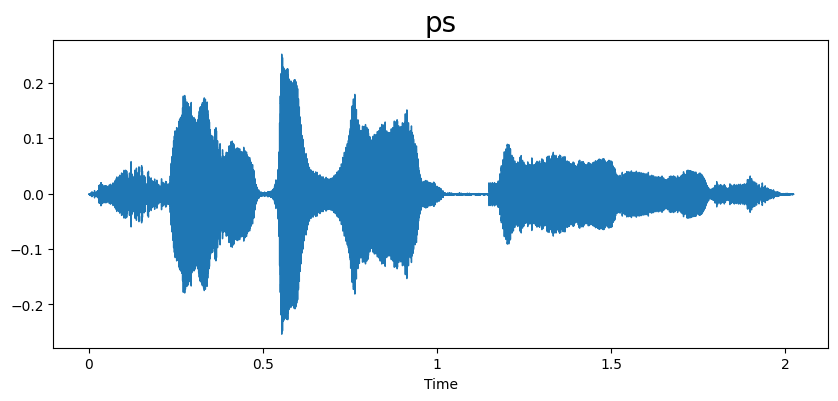

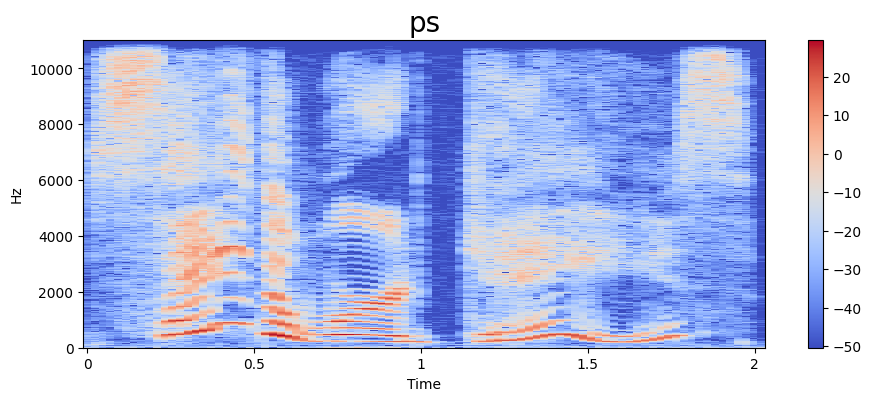

DISGUST


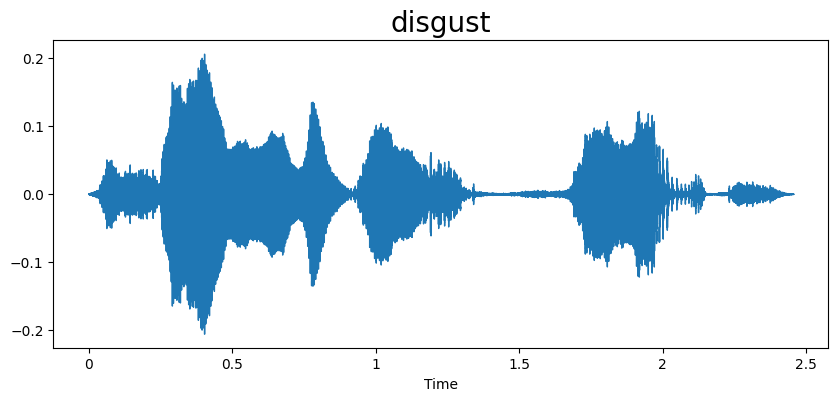

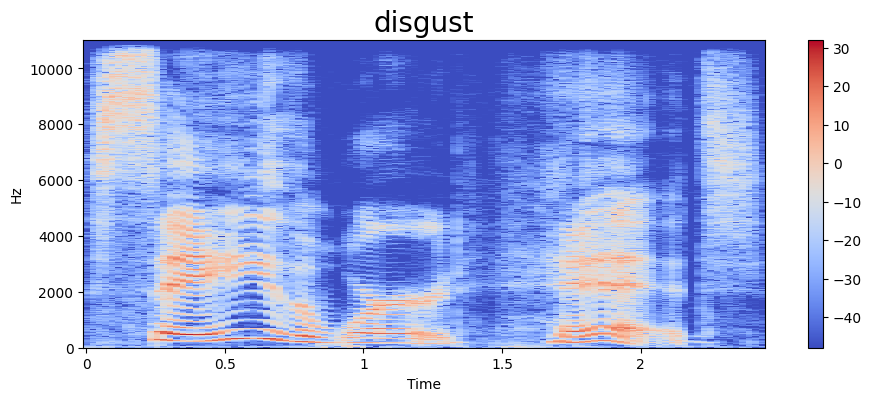

NEUTRAL


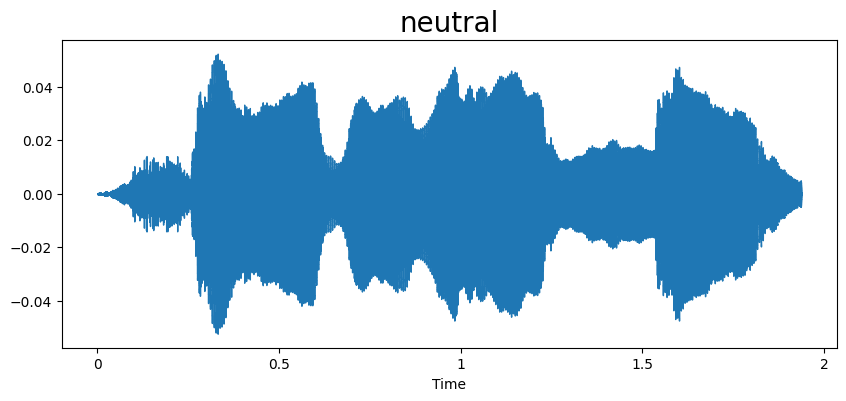

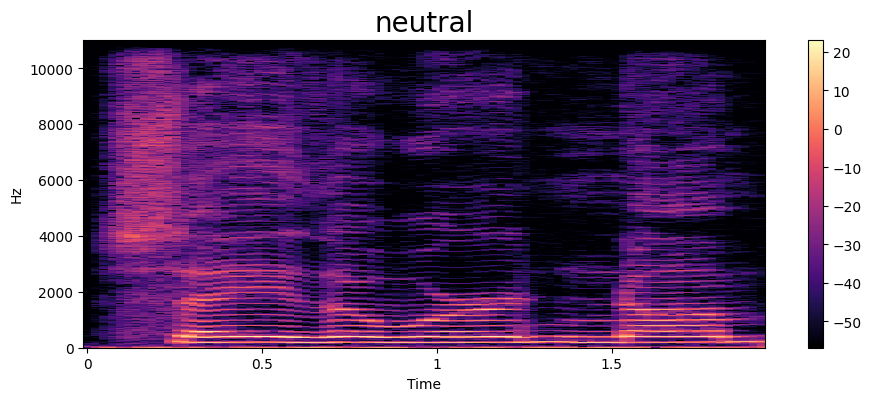

HAPPY


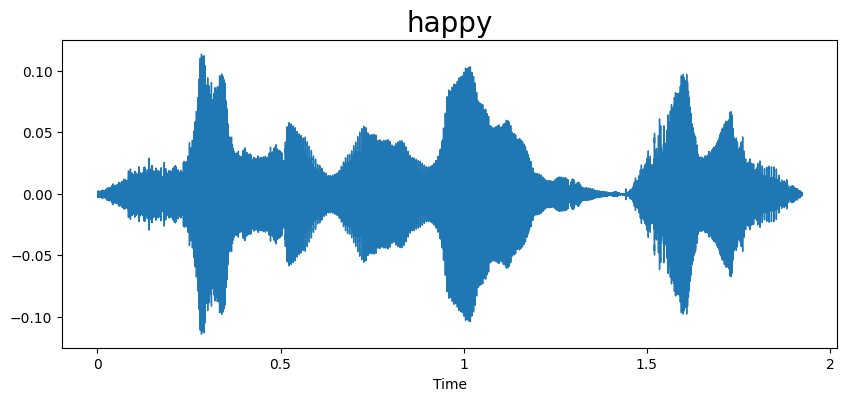

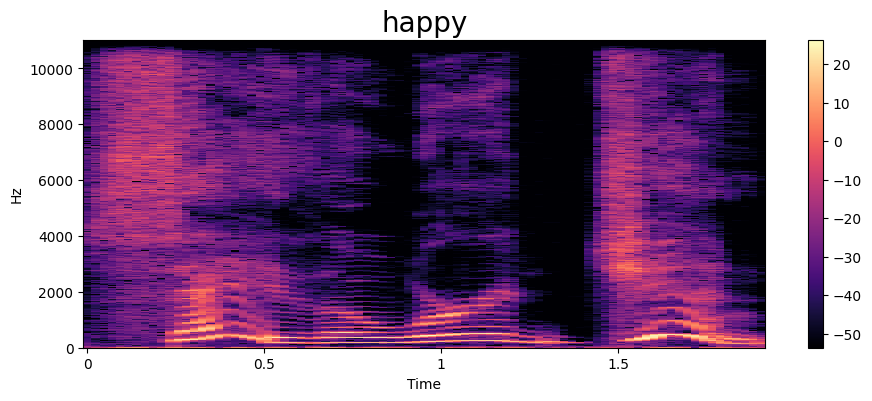

SAD


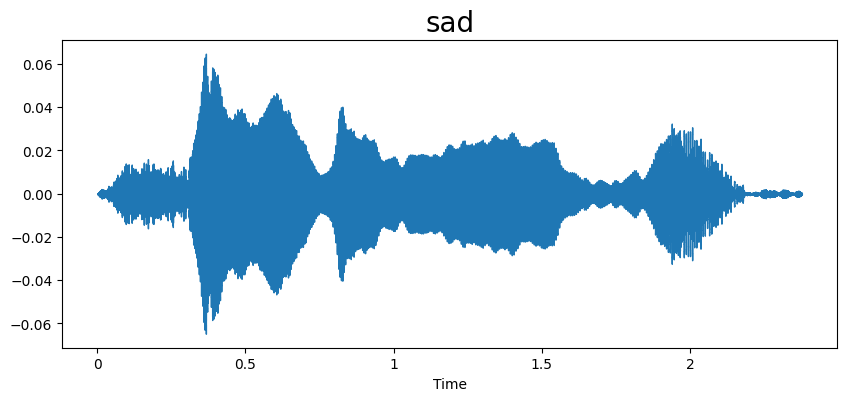

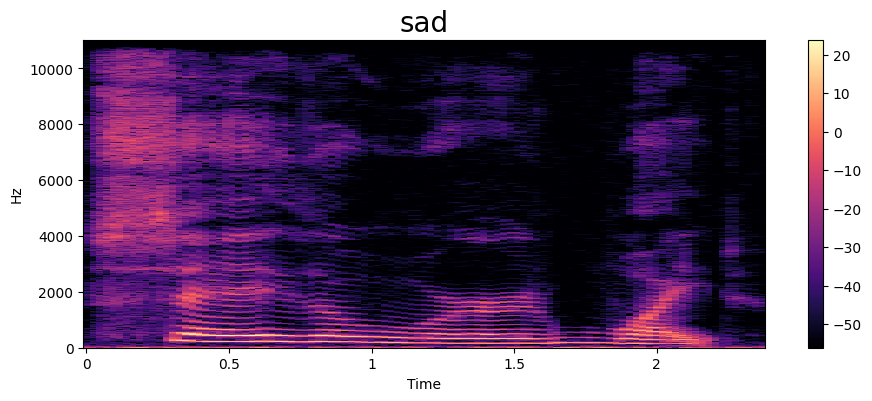

ANGRY


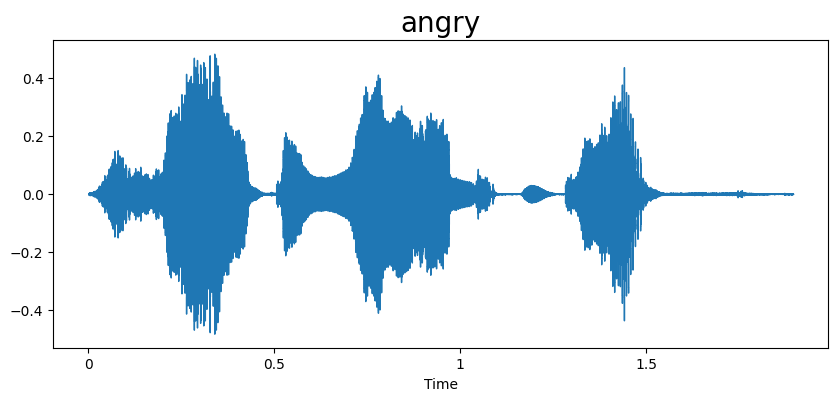

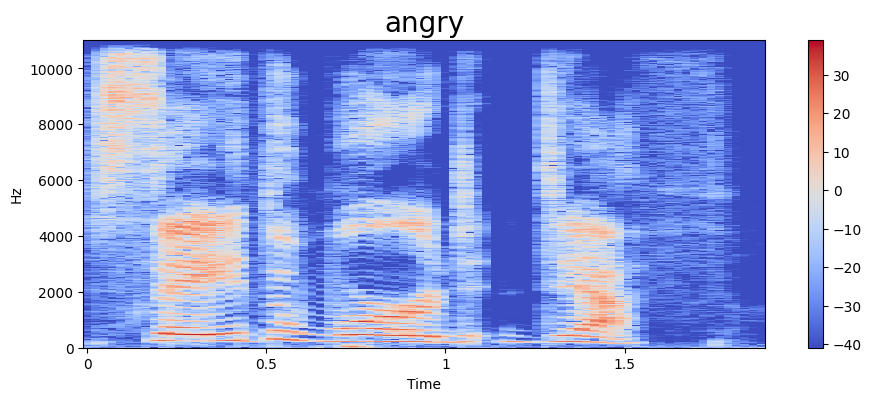

FEAR


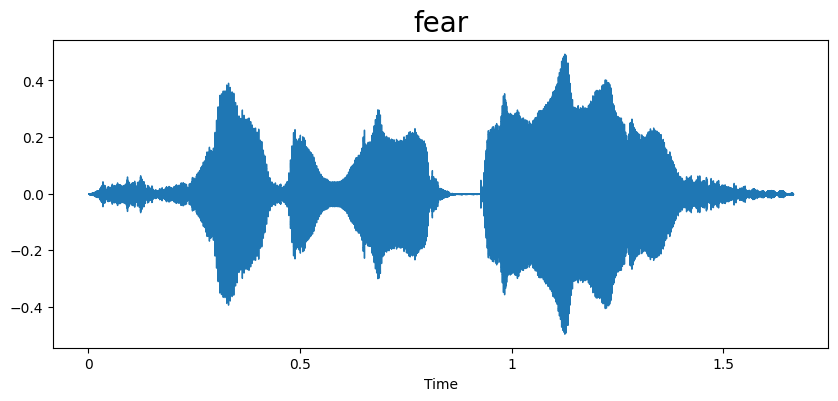

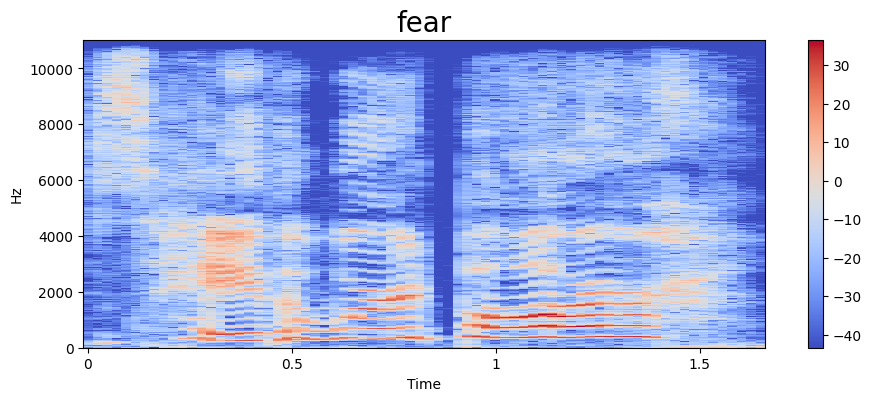

In [13]:
# Visualize the waveplot and spectogram of the audio files with different emotions
emotions = list(df['label'].unique())
for emotion in emotions:
    print(emotion.upper())
    path = np.array(df['speech'][df['label'] == emotion])[0]
    data, sampling_rate = librosa.load(path)
    display(Audio(path))
    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)


## Feature Extraction

In [14]:
# Define a fuction to extract MFCC features
def extract_mfcc(filename):
    """
    Extracts MFCC features from the audio file
    
    Args: filename (str): path to the audio file
    
    Returns: MFCC features
    """
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [15]:
# Extract the first audio file
extract_mfcc(df['speech'][0])

array([-379.2972    ,   47.593075  ,    9.758281  ,   17.873692  ,
        -15.280322  ,  -10.983431  ,   -2.6798623 ,  -17.234467  ,
        -14.8215475 ,   -2.9197783 ,  -17.520079  ,   -1.5276155 ,
        -11.848193  ,    4.3819213 ,    1.4002603 ,    5.000765  ,
          6.211599  ,    6.2973275 ,   -3.3134427 ,    4.8972707 ,
         -6.680003  ,    5.065834  ,   -3.2840173 ,   -2.3672223 ,
         -1.2371913 ,    1.0721118 ,    0.59265196,    8.979138  ,
          7.887764  ,   16.943417  ,   11.9249525 ,   12.03099   ,
          5.951722  ,    4.8789954 ,    1.4411013 ,    4.3600345 ,
          2.4106553 ,    3.7441258 ,   -1.3378919 ,    2.0801432 ],
      dtype=float32)

In [16]:
# Extract MFCC features from all the audio files
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

0       [-379.2972, 47.593075, 9.758281, 17.873692, -1...
1       [-373.00983, 76.81736, -8.529129, -23.647287, ...
2       [-327.55618, 59.173866, -39.386566, -7.17268, ...
3       [-352.90836, 96.29178, 5.2032127, -5.131731, -...
4       [-275.07626, 44.920246, -24.824015, -11.028033...
                              ...                        
2795    [-438.84384, 91.219315, 38.05042, -3.11005, -3...
2796    [-464.57654, 95.17878, 19.505245, -17.22445, -...
2797    [-462.55728, 83.242035, 2.6170354, -7.4365683,...
2798    [-453.0071, 62.359005, 10.44486, 3.8940454, 12...
2799    [-444.64172, 67.63602, 7.542812, -3.9044952, -...
Name: speech, Length: 2800, dtype: object

In [17]:
# Convert the extracted MFCC Features to an array
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [18]:
# Expand the dimensions of the array
X = np.expand_dims(X, axis=-1)
X.shape

(2800, 40, 1)

In [19]:
# Convert the categorical labels to numerical labels
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y = encoder.fit_transform(df[['label']]).toarray()
y.shape

(2800, 7)

In [20]:
# Split the data to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create LTSM model


In [21]:
# Create a LTSM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.2672 - loss: 1.8289 - val_accuracy: 0.5929 - val_loss: 1.0303
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5352 - loss: 1.1668 - val_accuracy: 0.8339 - val_loss: 0.6642
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.6803 - loss: 0.8390 - val_accuracy: 0.9071 - val_loss: 0.2836
Epoch 4/30
11/35 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8325 - loss: 0.5049

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.8374 - loss: 0.5021 - val_accuracy: 0.9357 - val_loss: 0.1968
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.8962 - loss: 0.3388 - val_accuracy: 0.9268 - val_loss: 0.1877
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9220 - loss: 0.2702 - val_accuracy: 0.9571 - val_loss: 0.1203
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9410 - loss: 0.2010 - val_accuracy: 0.9625 - val_loss: 0.1202
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9254 - loss: 0.2642 - val_accuracy: 0.9714 - val_loss: 0.1129
Epoch 9/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9348 - loss: 0.2335 - val_accuracy: 0.9643 - val_loss: 0.1140
Epoch 10/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9325 - loss: 0.2280 - val_accuracy: 0.9732 - val_loss: 0.0762
Epoch 11/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9658 - loss: 0.1298 - val_accuracy: 0.9750 - val_loss: 

In [32]:
# Save the model
model.save('/workspaces/Zidio-Internship/Model/emotion_detection.keras')

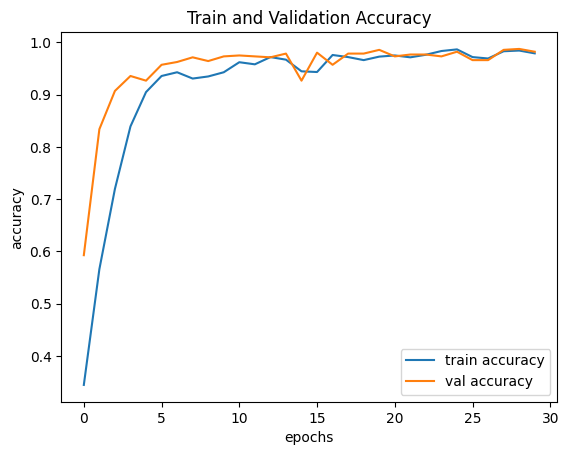

In [33]:
# PLotting the accuracies
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

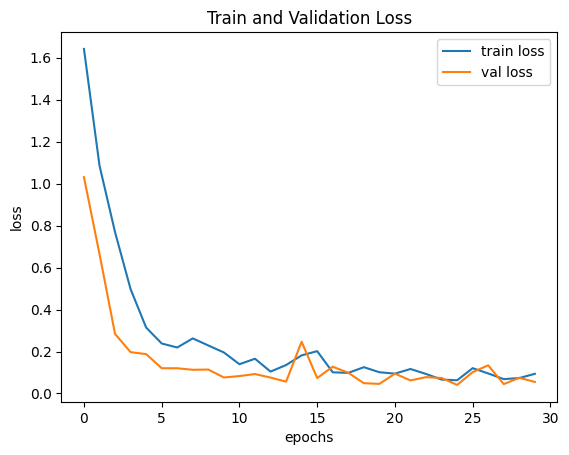

In [34]:
# Plotting the losses
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.title('Train and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [38]:
# Predict the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_test, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [39]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[72  0  0  2  0  0  0]
 [ 0 90  0  0  0  0  1]
 [ 0  1 72  0  0  0  0]
 [ 0  0  0 73  0  0  0]
 [ 0  0  0  0 84  0  0]
 [ 0  1  0  3  1 70  1]
 [ 0  0  0  0  0  0 89]]


In [27]:
# Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

       angry       1.00      0.97      0.99        74
     disgust       0.98      0.99      0.98        91
        fear       1.00      0.99      0.99        73
       happy       0.94      1.00      0.97        73
     neutral       0.99      1.00      0.99        84
          ps       1.00      0.92      0.96        76
         sad       0.98      1.00      0.99        89

    accuracy                           0.98       560
   macro avg       0.98      0.98      0.98       560
weighted avg       0.98      0.98      0.98       560



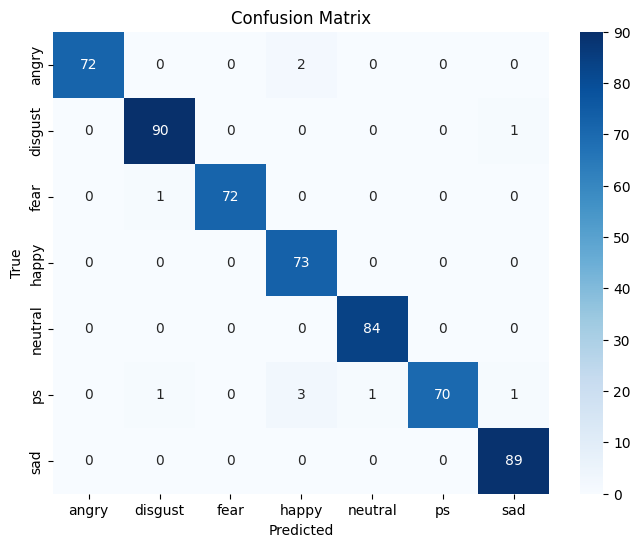

In [28]:
# Correlation HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()